## Solution to the second project

#### All the imports here

In [24]:
import numpy as np
from numpy import linspace, vstack, zeros, arange, power, abs
from scipy.stats import multivariate_normal as mn
from numpy.linalg import inv
import random
from time import time

#### Making matplotlib more tolerable

In [25]:
import matplotlib.pyplot as plt
%pylab inline
plt.xkcd();

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Plotting functions below

In [26]:
#plotting functions here

### Task 2.1 (yobibyte)

           5          4         3        2
0.0001658 x - 0.1422 x + 48.78 x - 8356 x + 7.152e+05 x - 2.446e+07


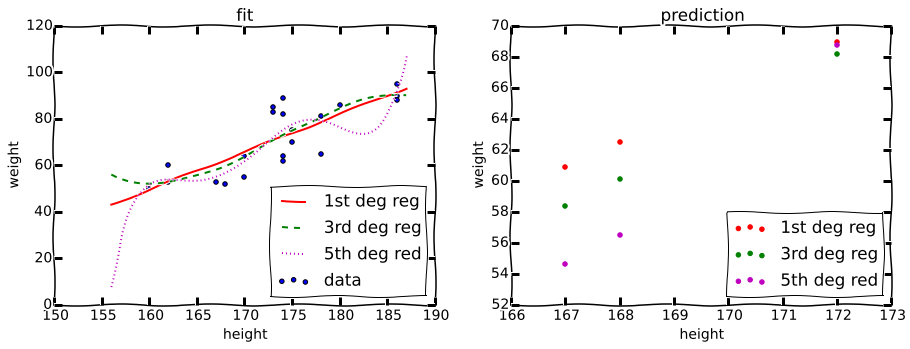

In [65]:
dt = np.dtype([('w', np.float), ('h', np.float), ('g', 'S1')])
data = np.loadtxt('./whData.dat', dtype=dt, comments='#', delimiter=None)

ws = data['w']
hs = data['h']
gs = np.array([el.decode('utf-8') for el in data['g']])

hs_t = hs[np.where(ws < 0)]
gs_t = gs[np.where(ws < 0)]
ws_t = ws[np.where(ws < 0)]

hs = np.delete(hs, np.where(ws < 0), None)
gs = np.delete(gs, np.where(ws < 0), None)
ws = np.delete(ws, np.where(ws < 0), None)

p = np.poly1d(polyfit(hs,ws,1))
p3 = np.poly1d(polyfit(hs,ws,3))
p5 = np.poly1d(polyfit(hs,ws,5))
xp = np.linspace(156, 187, 100)

colors = ['r'if el=='f' else 'b' for el in gs]

fig,axes = subplots(ncols=2, figsize=(15,5))
ax = axes[0]
ax2 = axes[1]

ax.set_title('fit')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.scatter(hs, ws, label='data')
ax.plot(xp, p(xp), '-', label='1st deg reg', color='r')
ax.plot(xp, p3(xp), '--', label='3rd deg reg',color='g')
ax.plot(xp, p5(xp), ':', label='5th deg red',color='m')
legend = ax.legend(loc='lower right')

ax2.set_ylabel('weight')
ax2.set_xlabel('height')
ax2.set_title('prediction')
ax2.scatter(hs_t, p(hs_t), label='1st deg reg', color='r')
ax2.scatter(hs_t, p3(hs_t), label='3rd deg reg',color='g')
ax2.scatter(hs_t, p5(hs_t), label='5th deg red',color='m')
legend = ax2.legend(loc='lower right')

### Task 2.2 (yakun)

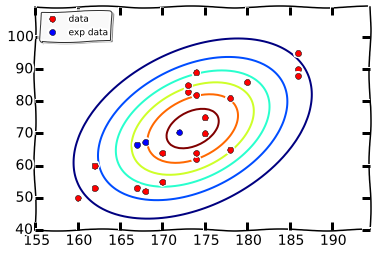

In [28]:
h_mean, h_std, h_var = np.mean(hs), np.std(hs), np.var(hs)
w_mean, w_std, w_var = np.mean(ws), np.std(ws), np.var(ws)
correlation_h_w = np.linalg.det(np.cov(hs, ws) / (h_std * w_std))
joint_mean = np.array([h_mean, w_mean])
joint_cov = np.mat([[h_var, correlation_h_w * h_std * w_std], [correlation_h_w * h_std * w_std, w_var]])

#  predict
exp_w = [w_mean + correlation_h_w * (w_std / h_std) * (el - h_mean) for el in hs_t]

#  plot
x, y = np.mgrid[155:195:0.5, 40:110:0.5]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = mn.pdf(pos, joint_mean, joint_cov)
ax2.contour(x, y, rv)
X = np.vstack((hs, ws))
Pre = np.vstack((hs_t, exp_w))
ax2.plot(X[0, :], X[1, :], 'ro', label='data')
ax2.plot(Pre[0, :], Pre[1, :], 'ro', label='exp data', color='blue')
leg = ax2.legend(loc='upper left', shadow=True, fancybox=True, numpoints=1, prop={'size':9})
leg.get_frame().set_alpha(0.8)

### Task 2.3 (yakun)

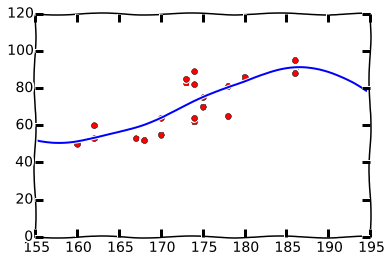

In [82]:
# x->hs, y->ws
X =np.array([np.array([np.power(x, 0), np.power(x, 1), np.power(x, 2), np.power(x, 3), np.power(x, 4), np.power(x, 5)]) for x in hs])
mat_inv = inv(np.dot(X.transpose(), X)  + (h_var / 3) * np.identity(6))
w_map = np.dot(np.dot(mat_inv, X.transpose()), ws)

# plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_xlim([155, 195])
ax2.set_ylim([0, 120])
x = np.arange(155, 195, 0.5)
re = w_map[0] * np.power(x, 0) + w_map[1] * np.power(x, 1) + w_map[2] * np.power(x, 2) + w_map[3] * np.power(x, 3) + w_map[4] * np.power(x, 4) + w_map[5] * np.power(x, 5)
ax2.plot(hs, ws, 'ro', label='data')
ax2.plot(x, re)

### Task 2.4 (yobibyte)

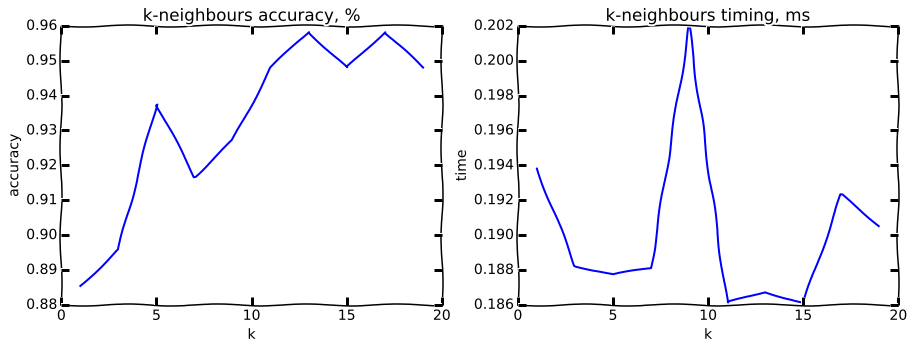

In [15]:
n = [1,3,5,7,9,11,13,15,17,19]

dt = np.dtype([('x1', np.float), ('x2', np.float), ('y',  np.float)])

data = np.loadtxt('resources/data2-train.dat', dtype=dt, comments='#', delimiter=None)
Xtr,ytr = np.array([[el[0],el[1]] for el in data]),data['y']

data = np.loadtxt('resources/data2-test.dat', dtype=dt, comments='#', delimiter=None)
Xt,yt = np.array([[el[0],el[1]] for el in data]),data['y']

#k-neighbours train is just storing the train data
#that is already done

#test
preds = []
timing = []
for k in n:
    st_t = time()
    curr_pred = []
    for p in Xt:
        dist = [np.abs(np.linalg.norm(tr-p)) for tr in Xtr]
        neighbours = np.argsort(dist)[:k]
        n_vals = ytr[neighbours]
        #hey! will be strange for even k's
        pred = 1.0 if sum(n_vals) > 0 else -1.0
        curr_pred.append(pred)
    timing.append(time()-st_t)
    preds.append(curr_pred)
    
acc = []
for p in preds:
    corr = [int(i)==int(j) for i,j in zip(yt,p)]
    corr = sum(corr)/(1.0*len(corr))
    acc.append(corr)  
    
fig,axes = subplots(ncols=2, figsize=(15,5))
ax = axes[0]
ax2 = axes[1]

ax.set_title('k-neighbours accuracy, %')
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.plot(n, acc);    

ax2.set_title('k-neighbours timing, ms')
ax2.set_xlabel('k')
ax2.set_ylabel('time')
ax2.plot(n, timing);

### Task 2.5

In [8]:
#Code here